In [18]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from scipy.stats import zscore

In [24]:
# Function to load and preprocess data
def load_and_preprocess_data():
    data = load_breast_cancer()  # Load the dataset
    X = pd.DataFrame(data.data, columns=data.feature_names)
    y = data.target

# Data cleaning: handle missing values
    if X.isnull().sum().sum() > 0:
        X.fillna(X.mean(), inplace=True)

# Data cleaning: handle duplicates
    X['target'] = y
    X = X.drop_duplicates()
    y = X['target'].values
    X = X.drop(columns=['target'])

# Data transformation: standardize the features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Outlier detection and removal using Z-score
    z_scores = np.abs(zscore(X_scaled))
    X_clean = X_scaled[(z_scores < 3).all(axis=1)]
    y_clean = y[(z_scores < 3).all(axis=1)]

    return X_clean, y_clean

In [25]:
# Function to apply PCA
def apply_pca(X, n_components=2):
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X)
    return X_pca

In [26]:
# Function to train and evaluate logistic regression
def train_and_evaluate_logistic_regression(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    log_reg = LogisticRegression(max_iter=1000)
    log_reg.fit(X_train, y_train)
    y_pred = log_reg.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy, log_reg, X_test, y_test

In [32]:
# Function to save PCA data
def save_pca_data(X_pca, y, filename='C:/brotherman/MILESTONE TWO/transformed_data.csv'):
    pca_df = pd.DataFrame(data=X_pca, columns=['PCA1', 'PCA2'])
    pca_df['target'] = y
    pca_df.to_csv(filename, index=False)

In [28]:
# Function to plot PCA
def plot_pca(X_pca, y):
    plt.figure(figsize=(8, 6))
    plt.scatter(X_pca[y == 0, 0], X_pca[y == 0, 1], color='red', label='Malignant')
    plt.scatter(X_pca[y == 1, 0], X_pca[y == 1, 1], color='blue', label='Benign')
    plt.xlabel('PCA1')
    plt.ylabel('PCA2')
    plt.title('PCA of Breast Cancer Dataset')
    plt.legend()
    plt.savefig('pca_plot.png')
    plt.show()

In [30]:
# Function to plot decision boundary
def plot_decision_boundary(log_reg, X_test, y_test):
    h = .02  # step size in the mesh
    x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
    y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = log_reg.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X_test[y_test == 0, 0], X_test[y_test == 0, 1], color='red', label='Malignant')
    plt.scatter(X_test[y_test == 1, 0], X_test[y_test == 1, 1], color='blue', label='Benign')
    plt.xlabel('PCA1')
    plt.ylabel('PCA2')
    plt.title('Decision Boundary with Logistic Regression')
    plt.legend()
    plt.savefig('decision_boundary.png')
    plt.show()

Accuracy: 0.98


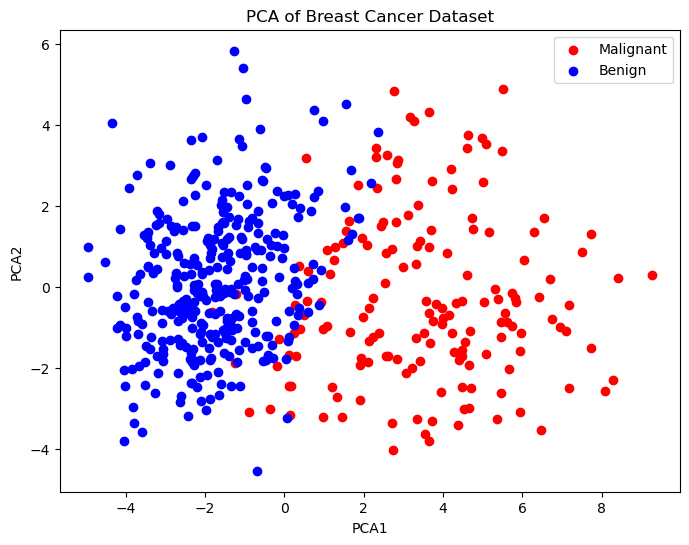

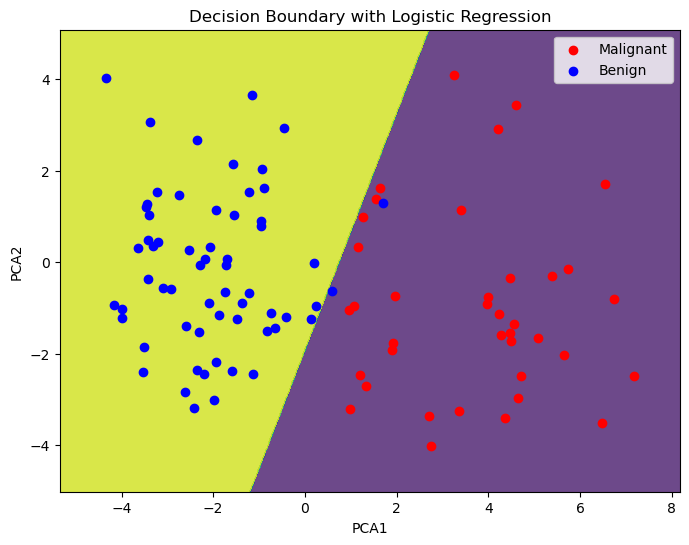

In [33]:
# Main function to execute the workflow
def main():
    X, y = load_and_preprocess_data()
    X_pca = apply_pca(X)
    accuracy, log_reg, X_test, y_test = train_and_evaluate_logistic_regression(X_pca, y)
    print(f"Accuracy: {accuracy:.2f}")
    save_pca_data(X_pca, y)
    plot_pca(X_pca, y)
    plot_decision_boundary(log_reg, X_test, y_test)

# Execute main function
if __name__ == "__main__":
    main()